# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż poniższe przykady:

***Zadanie 1.*** 

Rozwiąż równanie $\dot{x}(t)=\frac{x+t}{x-t}$, $x(0)=1$ (równanie to posiada rozwiązanie dokładne $x(t)=t+\sqrt{1+2t^2}$). Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.

In [2]:
import numpy as np
from typing import Union, Callable

def solve_euler(fun, t_span: np.array, y0: np.array):
    ''' 
    Funkcja umożliwiająca rozwiązanie układu równań różniczkowych z wykorzystaniem metody Eulera w przód.

    Parameters:
    fun: Prawa strona równania. Podana funkcja musi mieć postać fun(t, y). 
    Tutaj t jest skalarem i istnieją dwie opcje dla ndarray y: Może mieć kształt (n,); wtedy fun musi zwrócić array_like z kształtem (n,). 
    Alternatywnie może mieć kształt (n, k); wtedy fun musi zwrócić tablicę typu array_like z kształtem (n, k), tj. każda kolumna odpowiada jednej kolumnie w y. 
    t_span: wektor czasu dla którego ma zostać rozwiązane równanie
    y0: warunke początkowy równanai o wymiarze (n,)
    Results:
    (np.array): macierz o wymiarze (n,m) zawierająca w wkolumnach kolejne rozwiązania fun w czasie t_span.  

    '''

    s = [y0]
    for i in range(0, len(t_span) - 1):
        dt = t_span[i + 1] - t_span[i]
        ds = s[-1] + dt * np.array([j(t_span[i], s[-1]) for j in fun])
        s.append(ds)
    return np.array(s)

<ipython-input-2-7cc79428ac45>:22: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  ds = s[-1] + dt * np.array([j(t_span[i], s[-1]) for j in fun])
<ipython-input-2-7cc79428ac45>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Rozwiązanie metodą RK45')

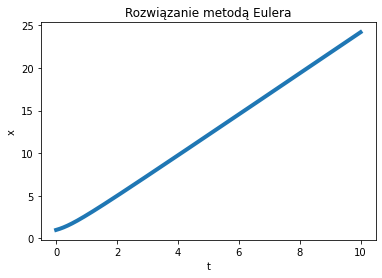

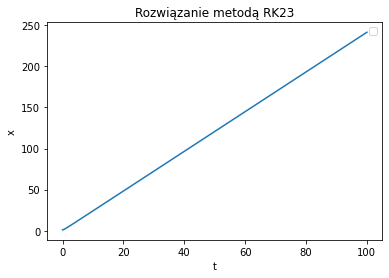

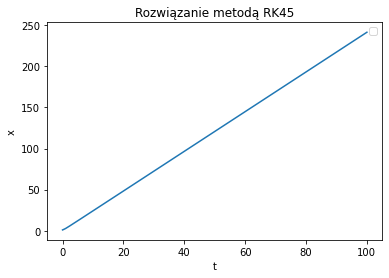

In [3]:
f_dok = lambda t : t+ np.sqrt(1+2*t**2)
t = np.linspace(0,10,1000)

def x_prim(t,x):
    return (x+t)/(x-t)

plt.figure()
plt.plot(t,solve_euler(np.array([x_prim]),t,1),linewidth=4)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Rozwiązanie metodą Eulera')

def dxdt1(t,x):
    return (x+t)/(x-t)

def fun1(t):
    return t + math.sqrt(1+2*t**2)

x= np.linspace(0,100)
y= np.array([fun1(i) for i in x])

tspan = [0,100]
x0=[1]

sol23 = integrate.solve_ivp(dxdt1, tspan, x0,  method='RK23')
sol45 = integrate.solve_ivp(dxdt1, tspan, x0,  method='RK45')

plt.figure()
plt.plot(sol23.t, sol23.y[0])
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Rozwiązanie metodą RK23")

plt.figure()
plt.plot(sol45.t, sol45.y[0])
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Rozwiązanie metodą RK45")


***Zadanie 2.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

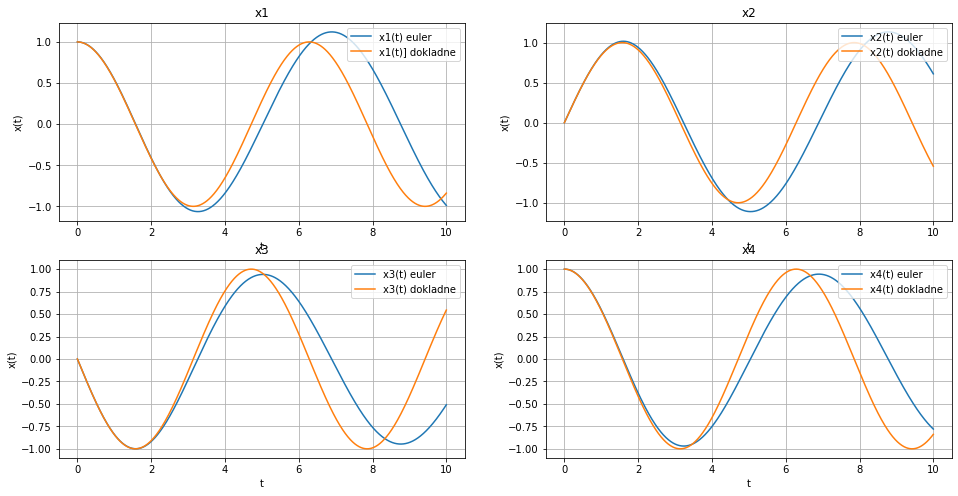

In [4]:
t = np.linspace(0,10,1000)
def x_1(t,x):
    x_1 = x[2]
    return x_1

def x_2(t,x):
    x_2 = x[3]
    return x_2

def x_3(t,x):
    x_3 = -x[0]/((x[0]**2+x[1]**2)**(3/2))
    return x_3

def x_4(t,x):
    x_4 = -x[1]/((x[0]**2+x[1]**2)**(3/2))
    return x_4

x_prims = np.array([x_1,x_2,x_3,x_4])

x0=np.array([1,0,0,1])
x=np.linspace(0,10,1000)
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(t,solve_euler(x_prims,t,x0)[:,0])
plt.plot(x,np.cos(x))
plt.legend(['x1(t) euler','x1(t)] dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x1')
plt.grid(True) 

plt.subplot(2,2,2)
plt.plot(t,solve_euler(x_prims,t,x0)[:,1])
plt.plot(x,np.sin(x))
plt.legend(['x2(t) euler','x2(t) dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x2')
plt.grid(True)   


plt.subplot(2,2,3)
plt.plot(t,solve_euler(x_prims,t,x0)[:,2])
plt.plot(x,-np.sin(x))
plt.legend(['x3(t) euler','x3(t) dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x3')
plt.grid(True)   

plt.subplot(2,2,4)
plt.plot(t,solve_euler(x_prims,t,x0)[:,3])
plt.plot(x,np.cos(x))
plt.legend(['x4(t) euler','x4(t) dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x4')
plt.grid(True)   

Text(0.5, 1.0, 'Rozwiązanie metodą RK45')

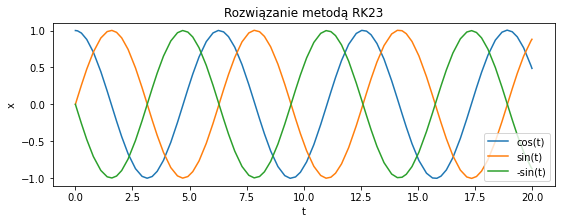

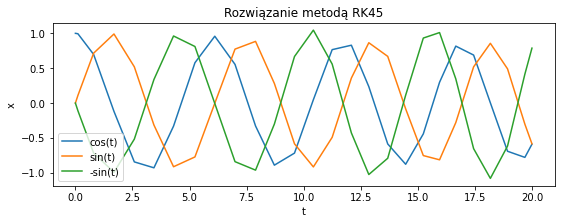

In [5]:
def dxdt2(t, x):
    v = [0, 0, 0, 0]
    v[0] = x[2]
    v[1] = x[3]
    v[2] = -(x[0])/(((x[0]**2)+(x[1]**2))**(3/2))
    v[3] = -(x[1])/(((x[0]**2)+(x[1]**2))**(3/2))
    return np.array(v)

def fun2(t):
    return np.cos(t), np.sin(t), -np.sin(t), np.cos(t)
    
x = np.linspace(0, 20, 100)

y0 = []
y1 = []
y2 = []

for i in x:
    a, b, c, d = fun2(i)
    y0.append(a)
    y1.append(b)
    y2.append(c)


tspan = [0, 20]
x0 = [1, 0, 0, 1]

sol23 = integrate.solve_ivp(dxdt2, tspan, x0, method='RK23')
sol45 = integrate.solve_ivp(dxdt2, tspan, x0, method='RK45')

plt.figure(figsize=(9,3))
plt.plot(sol23.t, sol23.y[0], label="cos(t)")
plt.plot(sol23.t, sol23.y[1], label="sin(t)")
plt.plot(sol23.t, sol23.y[2], label="-sin(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Rozwiązanie metodą RK23")

plt.figure(figsize=(9,3))
plt.plot(sol45.t, sol45.y[0], label="cos(t)")
plt.plot(sol45.t, sol45.y[1], label="sin(t)")
plt.plot(sol45.t, sol45.y[2], label="-sin(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Rozwiązanie metodą RK45")


***Zadanie 3.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

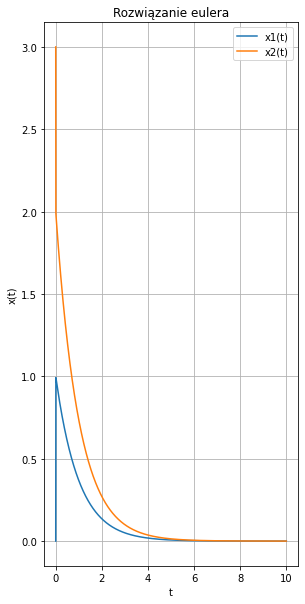

In [6]:
A = np.array([[-667,333],[666,-334]])


def x1(t,x):
    return x[0]*A[0][0] + x[1]*A[0][1]

def x2(t,x):
    return x[0]*A[1][0]+x[1]*A[1][1]

t = np.linspace(0,10,100000)
x = np.linspace(0,10,100000)
x_prims = np.array([x1,x2])
x0 = np.array([0,3]).T
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(t,solve_euler(np.array(x_prims),t,x0)[:,0])
plt.plot(t,solve_euler(np.array(x_prims),t,x0)[:,1])
plt.legend(['x1(t)','x2(t)'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Rozwiązanie eulera')
plt.grid(True)

Text(0.5, 1.0, 'Wynik RK45')

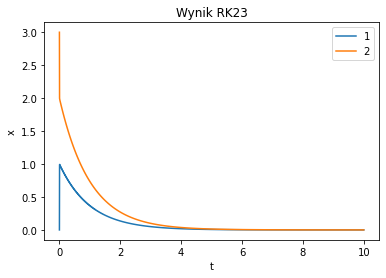

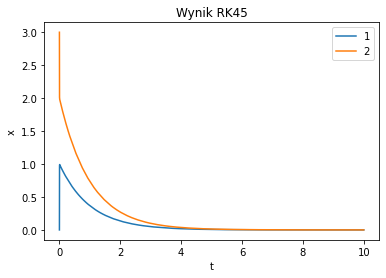

In [7]:
def dxdt3(t,x):
    A = np.array([[-667, 333], [666, -334]])
    return A @ x
    
x0 = np.array([0,3]).T
tspan = [0,10]

sol23 = integrate.solve_ivp(dxdt3, tspan, x0, method='RK23')
sol45 = integrate.solve_ivp(dxdt3, tspan, x0, method='RK45')

plt.figure()
plt.plot(sol23.t, sol23.y[0], label="1")
plt.plot(sol23.t, sol23.y[1], label="2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Wynik RK23")

plt.figure()
plt.plot(sol45.t, sol45.y[0], label="1")
plt.plot(sol45.t, sol45.y[1], label="2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Wynik RK45")

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1+\mu'}{D_2}\\
\dot{x_3}(t)x_4(t)\\
\dot{x_4}(t)=x_3-2x_2-\mu'\frac{x_3}{D_1}
-\mu\frac{x_3}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1+\mu)^2+{x_3}^2)^\frac{3}{2}\\
D_2=((x_1-\mu')^2+{x_3}^2)^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

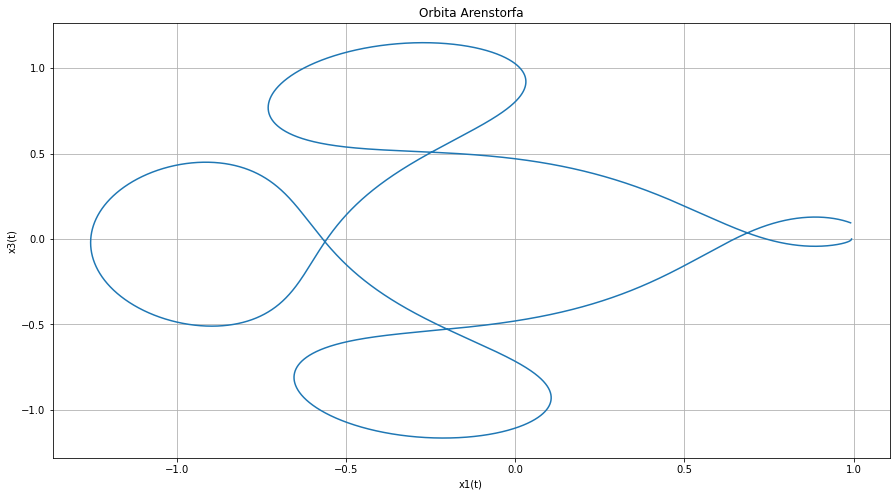

In [8]:
mi  = 0.012277471
mi_prim = 1 - mi
def D1(t,x):
    return ((x[0]+mi)**2+x[2]**2)**(3/2)

def D2(t,x):
    return ((x[0]-mi_prim)**2+x[2]**2)**(3/2)

def x1(t,x):
    return x[1]

def x2(t,x):
    return x[0] + 2* x[3] - mi_prim * (x[0]+mi)/D1(t,x) - mi * (x[0]-mi_prim)/D2(t,x)

def x3(t,x):
    return x[3]

def x4(t,x):
    return x[2] - 2 * x[1] - mi_prim * x[2]/D1(t,x) - mi * x[2]/D2(t,x)

orbits = np.array([x1,x2,x3,x4])
T = 17.0652165601579625588917206249
t = np.linspace(0, T, 1000000)  
x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
plt.figure(figsize=(15, 8))
plt.plot(solve_euler(orbits,t,x0)[:,0],solve_euler(orbits,t,x0)[:,2])
plt.ylabel("x3(t)")
plt.xlabel("x1(t)")
plt.title('Orbita Arenstorfa')
plt.grid()

Text(0.5, 1.0, 'Wynik RK45')

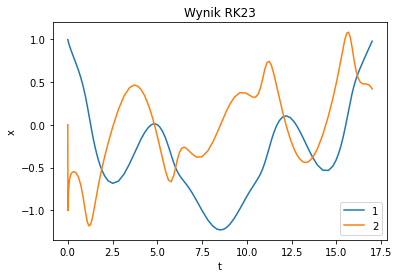

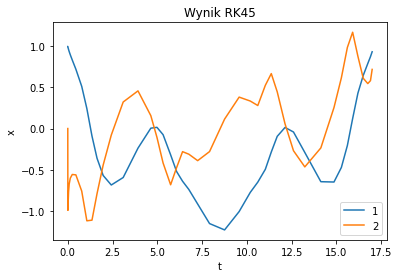

In [9]:
def dxdt4(t, x):
    
    u = 0.012277471
    u_p = 1 - u
    D1 = ((x[0]+u)**2 +x[2]**2)**(3/2)
    D2 = ((x[0]-u_p)**2 +x[2]**2)**(3/2)
    v = [0, 0, 0, 0]
    v[0] = x[1]
    v[1] = x[0] + 2*x[3] - u_p*(x[0]+u)/D1 - u*(x[0]-u_p)/D2
    v[2] = x[3]
    v[3] = x[2] - 2*x[1] - u_p*x[2]/D1 - u*x[2]/D2
    return v


x0 = [0.994, 0, 0, -2.00158510637908252240537862224]
tspan = [0, 17]




sol23 = integrate.solve_ivp(dxdt4, tspan, x0, method='RK23')
sol45 = integrate.solve_ivp(dxdt4, tspan, x0, method='RK45')

plt.figure()
plt.plot(sol23.t, sol23.y[0], label="1")
plt.plot(sol23.t, sol23.y[1], label="2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Wynik RK23")

plt.figure()
plt.plot(sol45.t, sol45.y[0], label="1")
plt.plot(sol45.t, sol45.y[1], label="2")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.title("Wynik RK45")

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.


Wnioski:  
Ćwiczenia te pozwoliły mi zapoznać się z nową metodą rozwiązywania równań różniczkowych mianowicie metodą Rungego-Kutty. Sprawozdanie to miało mi pokazać różnice w rozwiązywaniu równań pomiędzy metodą Eulera poznaną na poprzednich ćwiczeniach i metodą Rungego Kutty. Jeżeli chodzi o metodę Eulera opiera się ona na rozwinięciu w szereg Taylora. Nie nadaje się ona do dokładnych obliczeń oraz trzeba ich wykonać bardzo dużo. Powyższe zadania obrazują nam, że metoda Rungego-Kutty jest o wiele dokładniejsza.Również wyniki uzyskane metodą RK 45 okazała się być dużo mniej dokładne niż te uzyskane metodą RK23. Jeżeli chodzi o zadanie 3 to dokładnym rozwiązaniem jest najprawdopodobniej impuls jednostkowy. Natomiast jeżeli chodzi o zadanie dotyczące macierzy to Rozwiązaniem układu równań w postaci $\dot{x}(t) = \textbf{A}x(t)$ z warunkiem początkowym $x(t_0) = x_0$ jest równanie $x(t) = e^{\textbf{A}(t - t_0)}x_0$. Macierz $e^{\textbf{A}(t - t_0)}x_0$ można obliczyć używając dekompozycji Jordana.
